In [112]:
import re
import datetime

# Function to parse the log file
def parse_log_file(file_path):
    data = []

    with open(file_path, 'r') as file:
        for line in file:
            # Check if the line contains 'Best objective'
            if 'Best objective' in line:
                iteration_data = {'best_objective': float(re.search(r'-?\d+\.\d+e[+-]\d+', line).group())}
                
                # Read the next few lines and save the result
                for _ in range(8):  # Assuming 8 lines follow 'Best objective' based on the provided example
                    line = next(file)
                    
                    if 'Iteration #' in line:
                        iteration_data['iteration'] = int(re.search(r'\d+', line).group())
                    elif 'Pricing New cluster' in line:
                        iteration_data['new_cluster'] = list(map(int, re.search(r'\[(.*?)\]', line).group(0).replace('[', '').replace(']', '').split(', ')))
                    elif 'Time' in line:
                        time_str = re.search(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d+', line).group()
                        iteration_data['time'] = datetime.datetime.strptime(time_str, "%Y-%m-%d %H:%M:%S.%f")
                    elif 'Master Objective' in line:
                        iteration_data['master_objective'] = float(re.search(r'-?\d+\.\d+', line).group())
                    elif 'Master Solution' in line:
                        iteration_data['master_solution'] = list(map(int, re.search(r'\[(.*?)\]', line).group(1).split(', ')))
                    elif 'Master Dual' in line:
                        iteration_data['master_dual'] = float(re.search(r'-?\d+\.\d+', line).group())
                
                data.append(iteration_data)

    return data

# Example usage:
log_file_path = './outputs/out6_200.txt'
parsed_data = parse_log_file(log_file_path)

# Print the parsed data for each iteration
for i, iteration_data in enumerate(parsed_data, start=1):
    print(f"Iteration #{i}:")
    print(f"  Best Objective: {iteration_data['best_objective']}")
    print(f"  Iteration: {iteration_data['iteration']}")
    print(f"  New Cluster: {iteration_data['new_cluster']}")
    print(f"  Time: {iteration_data['time']}")
    print(f"  Master Objective: {iteration_data['master_objective']}")
    print(f"  Master Solution: {iteration_data['master_solution']}")
    print(f"  Master Dual: {iteration_data['master_dual']}")
    print("\n")


Iteration #1:
  Best Objective: -3558.639441459
  Iteration: 2
  New Cluster: [1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  Time: 2024-03-06 08:47:58.240688
  Master Objective: 3562.12791261648
  Master Solution: [1, 1, 1, 1, 1, 0]
  Master Dual: 889.6598603647271


Iteration #2:
  Best Objective: -889.6598603647
  Iteration: 3
  New Cluster: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [113]:
parsed_data[590].keys()

dict_keys(['best_objective', 'new_cluster', 'iteration', 'time', 'master_objective', 'master_solution', 'master_dual'])

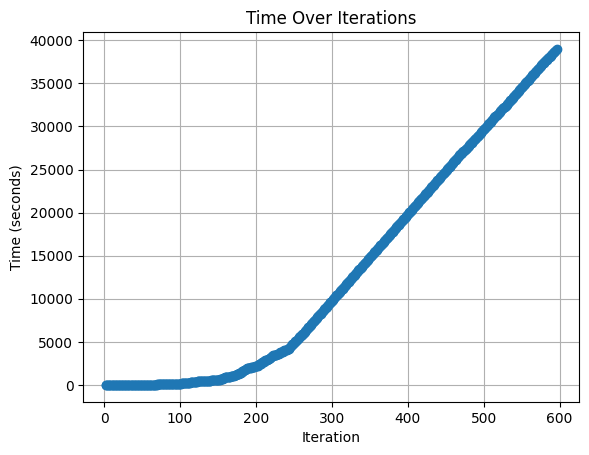

In [114]:
import matplotlib.pyplot as plt

# Assuming parsed_data is already defined
iterations = [iteration['iteration'] for iteration in parsed_data]
times = [iteration['time'] for iteration in parsed_data]

# Convert datetime objects to seconds for better visualization
time_seconds = [(time - times[0]).total_seconds() for time in times]

# Plotting
plt.plot(iterations, time_seconds, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Time (seconds)')
plt.title('Time Over Iterations')
plt.grid(True)
plt.show()


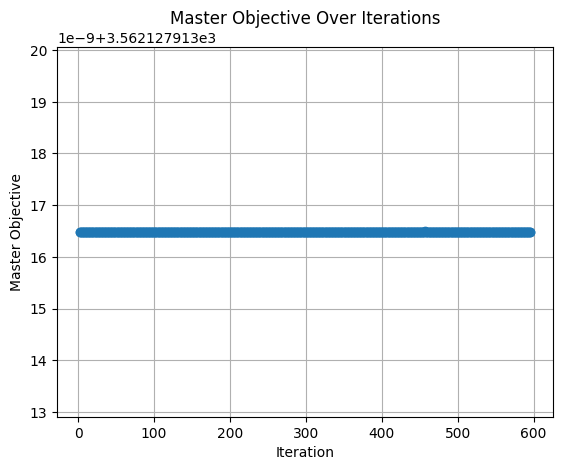

In [115]:
# Assuming parsed_data is already defined
iterations = [iteration['iteration'] for iteration in parsed_data]
objectives = [iteration['master_objective'] for iteration in parsed_data]


# Plotting
plt.plot(iterations, objectives, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Master Objective')
plt.title('Master Objective Over Iterations')
plt.grid(True)
plt.show()


In [116]:
from utils import *
from gurobipy import Env

env = Env()
env.setParam('LogToConsole', 0)
env.start()
filename = "test6"
n = 200
K = 5
seed = 5
l = 3
alpha = 1/2
beta = [1,1,1]
lower = 2
upper = n
M = 1e6
np.random.seed(seed)
labels = np.random.choice([0,1,2], p= [0.1,0.2,0.7], size=n)

X,Y,archetype = synthetic_data(n,K,seed)
centers, dist, q, clusters, clusters_assign, t = initialize_clusters(X,K,l,alpha,beta,n,labels,M,lower,upper)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-08


Optimizing Cluster Centers: 100%|██████████| 300/300 [00:00<00:00, 4327.86it/s, Status=SUCCESS]


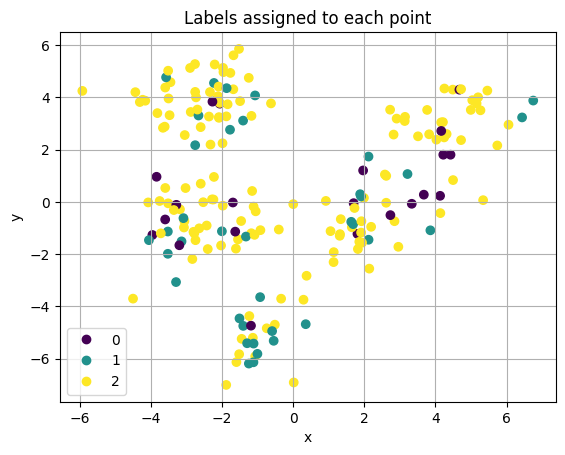

In [117]:
scatter = plt.scatter(X[:,0],X[:,1],c=labels,label="Groups")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Labels assigned to each point')
plt.grid(True)
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2])
plt.show()

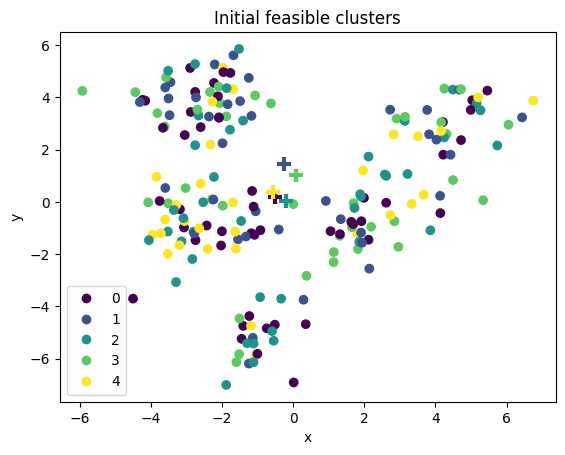

In [118]:
scatter = plt.scatter(X[:,0],X[:,1],c=clusters_assign,label="Groups")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Initial feasible clusters')
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2,3,4])
plt.scatter([x[0] for x in centers],[x[1] for x in centers], marker="+", c=[0,1,2,3,4], s=100, linewidth=3)
plt.show()

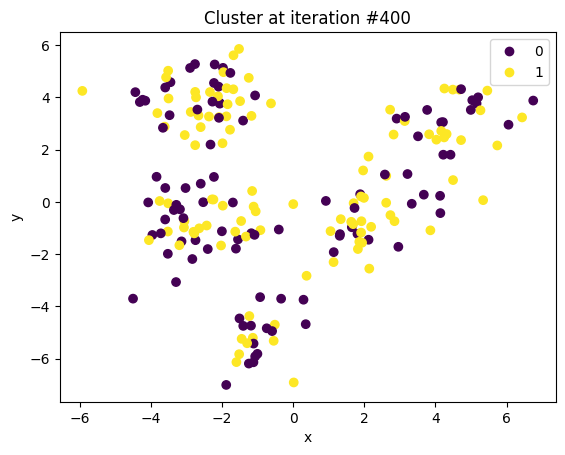

In [119]:
n = 400
scatter = plt.scatter(X[:,0],X[:,1],c=parsed_data[n]['new_cluster'],label="Groups")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cluster at iteration #'+str(n))
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1])
plt.show()

In [120]:
size_new_clusters = [sum(parsed_data[i]['new_cluster']) for i in range(len(parsed_data))]

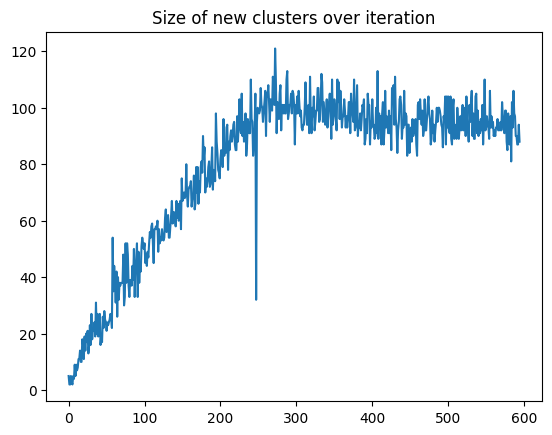

In [121]:
plt.plot(size_new_clusters)
plt.title("Size of new clusters over iteration")
plt.show()

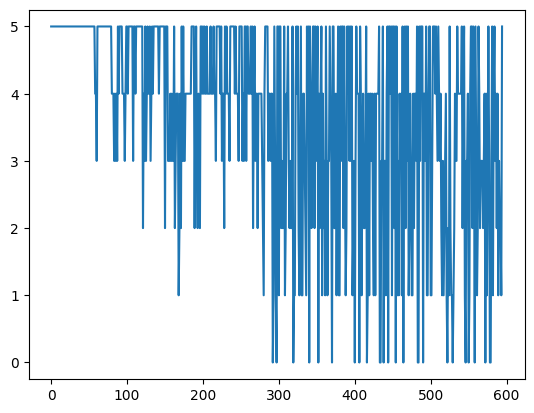

In [122]:
sizes_of_solutions = [sum(parsed_data[i]['master_solution']) for i in range(len(parsed_data))]
plt.plot(sizes_of_solutions)

In [102]:
sum(parsed_data[400]['master_solution'])

0

In [107]:
import re
import datetime

# Function to parse the log file
def parse_log_file(file_path):
    data = []

    with open(file_path, 'r') as file:
        for line in file:
            # Check if the line contains 'Best objective'
            if 'Master Solution' in line:
                data.append(list(map(int, re.search(r'\[(.*?)\]', line).group(1).split(', '))))

    return data

# Example usage:
log_file_path = './outputs/out6_200_display.txt'
parsed_data2 = parse_log_file(log_file_path)

In [111]:
sum(parsed_data2[60])

4

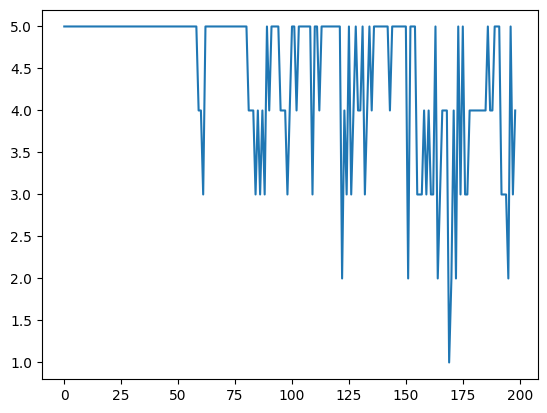

In [109]:
sizes = [sum(i) for i in parsed_data2]
plt.plot(sizes)

In [ ]:
import re
import datetime

# Function to parse the log file
def parse_log_file(file_path):
    data = []

    with open(file_path, 'r') as file:
        for line in file:
            # Check if the line contains 'Best objective'
            if 'Best objective' in line:
                iteration_data = {'best_objective': float(re.search(r'-?\d+\.\d+e[+-]\d+', line).group())}
                
                # Read the next few lines and save the result
                for _ in range(8):  # Assuming 8 lines follow 'Best objective' based on the provided example
                    line = next(file)
                    
                    if 'Iteration #' in line:
                        iteration_data['iteration'] = int(re.search(r'\d+', line).group())
                    elif 'Pricing New cluster' in line:
                        iteration_data['new_cluster'] = list(map(int, re.search(r'\[(.*?)\]', line).group(0).replace('[', '').replace(']', '').split(', ')))
                    elif 'Time' in line:
                        time_str = re.search(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d+', line).group()
                        iteration_data['time'] = datetime.datetime.strptime(time_str, "%Y-%m-%d %H:%M:%S.%f")
                    elif 'Master Objective' in line:
                        iteration_data['master_objective'] = float(re.search(r'-?\d+\.\d+', line).group())
                    elif 'Master Solution' in line:
                        iteration_data['master_solution'] = list(map(int, re.search(r'\[(.*?)\]', line).group(1).split(', ')))
                    elif 'Master Dual' in line:
                        iteration_data['master_dual'] = float(re.search(r'-?\d+\.\d+', line).group())
                
                data.append(iteration_data)

    return data

# Example usage:
log_file_path = './outputs/out7_slack3.txt'
parsed_data = parse_log_file(log_file_path)

# Print the parsed data for each iteration
for i, iteration_data in enumerate(parsed_data, start=1):
    print(f"Iteration #{i}:")
    print(f"  Best Objective: {iteration_data['best_objective']}")
    print(f"  Iteration: {iteration_data['iteration']}")
    print(f"  New Cluster: {iteration_data['new_cluster']}")
    print(f"  Time: {iteration_data['time']}")
    print(f"  Master Objective: {iteration_data['master_objective']}")
    print(f"  Master Solution: {iteration_data['master_solution']}")
    print(f"  Master Dual: {iteration_data['master_dual']}")
    print("\n")
